<a target="_blank" href="https://colab.research.google.com/github/BrunoCapron/EQE358-metodos_numericos/blob/main/Capitulo_7_Res_EDOs/Notebooks_Códigos/Algoritmos_Runge_Kutta.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Métodos de Runge-Kutta

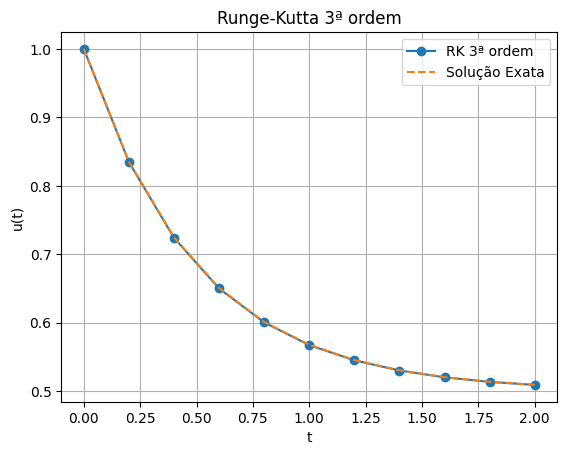

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exemplo: du/dt = -2u + 1; u(0) =1
def f(t, u): return -2*u + 1

# (solução exata: u(t) = 0.5 + 0.5*e^{-2t})

# Método de Runge-Kutta de 3ª ordem (clássico)
def rk3(f, t0, u0, h, N):
    t = [t0]
    u = [u0]
    for i in range(N):
        ti, ui = t[-1], u[-1]
        k1 = f(ti, ui)
        k2 = f(ti + h/2, ui + h*k1/2)
        k3 = f(ti + h, ui - h*k1 + 2*h*k2)
        u_next = ui + h * (k1 + 4*k2 + k3) / 6
        u.append(u_next)
        t.append(ti + h)
    return np.array(t), np.array(u)

# Aplicação
t, u = rk3(f, t0=0, u0=1, h=0.2, N=10)

plt.plot(t, u, 'o-', label='RK 3ª ordem')
plt.plot(t, 0.5 + 0.5*np.exp(-2*t), '--', label='Solução Exata')
plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend()
plt.grid()
plt.title('Runge-Kutta 3ª ordem')
plt.show()


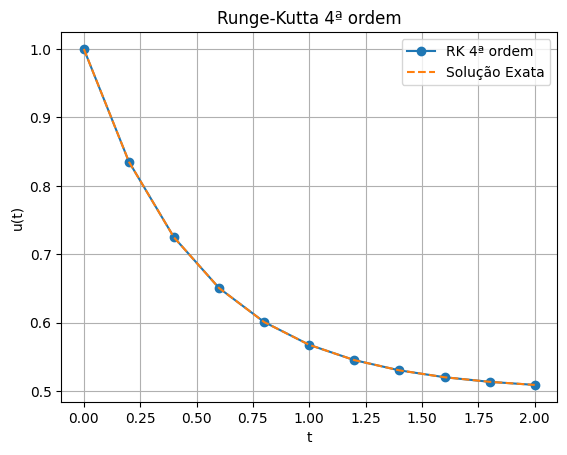

In [2]:
# Método de Runge-Kutta de 4ª ordem (clássico)
def rk4(f, t0, u0, h, N):
    t = [t0]
    u = [u0]
    for i in range(N):
        ti, ui = t[-1], u[-1]
        k1 = f(ti, ui)
        k2 = f(ti + h/2, ui + h*k1/2)
        k3 = f(ti + h/2, ui + h*k2/2)
        k4 = f(ti + h, ui + h*k3)
        u_next = ui + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        u.append(u_next)
        t.append(ti + h)
    return np.array(t), np.array(u)

# Aplicação
t, u = rk4(f, t0=0, u0=1, h=0.2, N=10)

plt.plot(t, u, 'o-', label='RK 4ª ordem')
plt.plot(t, 0.5 + 0.5*np.exp(-2*t), '--', label='Solução Exata')
plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend()
plt.grid()
plt.title('Runge-Kutta 4ª ordem')
plt.show()


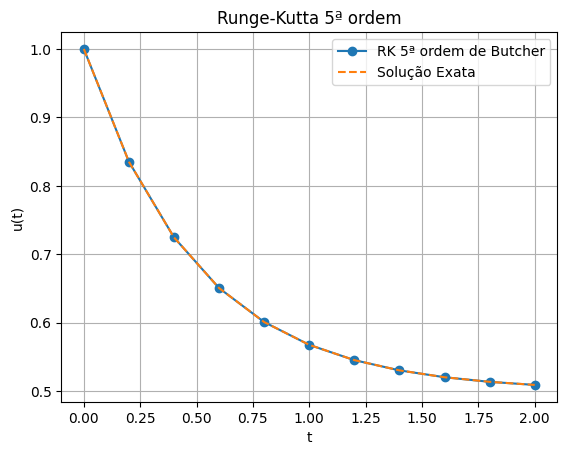

In [4]:
# Método de Runge-Kutta de 5ª ordem de Butcher (sem adaptatividade)
def rk5(f, t0, u0, h, N):
    t = [t0]
    u = [u0]
    for i in range(N):
        ti, ui = t[-1], u[-1]
        k1 = f(ti, ui)
        k2 = f(ti + h/4, ui + h*k1/4)
        k3 = f(ti + h/4, ui + h*(k1 + k2)/8)
        k4 = f(ti + h/2, ui + h*(-k2 + 2*k3)/2)
        k5 = f(ti + 3*h/4, ui + h*(3*k1 + 9*k4)/16)
        k6 = f(ti + h, ui + h*(-3*k1 + 2*k2 + 12*k3 - 12*k4 + 8*k5)/7)
        u_next = ui + h*(7*k1 + 32*k3 + 12*k4 + 32*k5 + 7*k6)/90
        u.append(u_next)
        t.append(ti + h)
    return np.array(t), np.array(u)

# Aplicação
t, u = rk5(f, t0=0, u0=1, h=0.2, N=10)

plt.plot(t, u, 'o-', label='RK 5ª ordem de Butcher')
plt.plot(t, 0.5 + 0.5*np.exp(-2*t), '--', label='Solução Exata')
plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend()
plt.grid()
plt.title('Runge-Kutta 5ª ordem')
plt.show()
